In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [27]:
sns.set( font_scale = 2,
       style = 'whitegrid',
       rc = {'figure.figsize':(20,7)})

In [40]:
avocado = pd.read_csv('C:/Users/79295/Desktop/GITHUB/Analytical-practice/datasets/avocado_full.csv')
avocado_mean = pd.read_csv('C:/Users/79295/Desktop/GITHUB/Analytical-practice/datasets/avocado_mean.csv')

In [41]:
avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
1,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
2,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
3,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
4,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


In [42]:
avocado_mean.head()

,Date,AveragePrice
0,2015-01-04,1.301296
1,2015-01-11,1.370648
2,2015-01-18,1.391111
3,2015-01-25,1.397130
4,2015-02-01,1.247037


In [43]:
# Посчитайте скользящее среднее цены авокадо (AveragePrice) с окном равным 3 (window). 
# Чему равно максимальное значение? Ответ округлите до 2 знаков после точки.

In [44]:
avocado_mean.dtypes

Date             object
AveragePrice    float64
dtype: object

In [45]:
avocado_mean.Date = pd.to_datetime(avocado_mean.Date)

In [46]:
avocado_mean = avocado_mean.set_index('Date')

In [47]:
rolling_avg_price_data = avocado_mean.rolling(3).mean().dropna()

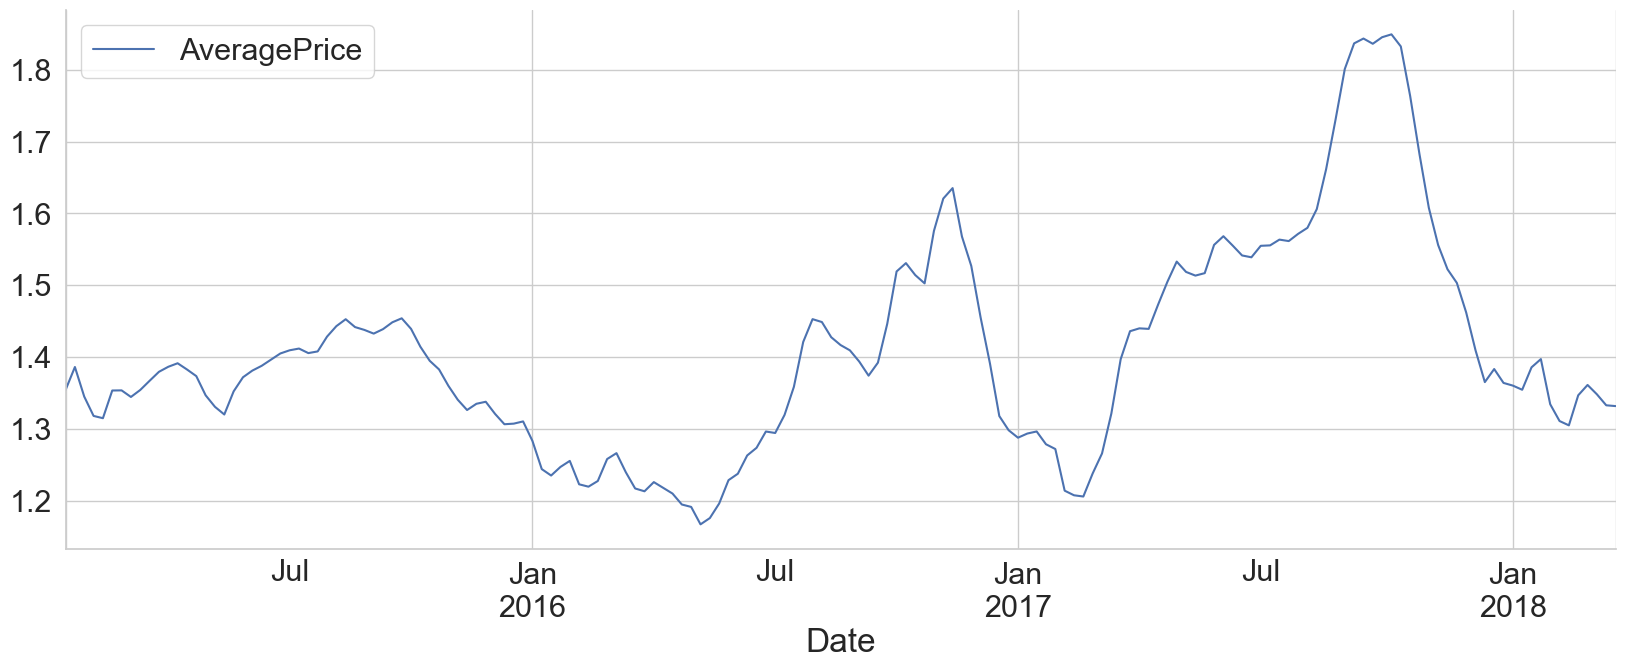

In [50]:
rolling_avg_price_data.plot()
sns.despine()

In [49]:
max_rolling_avg_price = rolling_avg_price_data.max().round(2)
max_rolling_avg_price

AveragePrice    1.85
dtype: float64

In [22]:
# построить графики скользящего среднего с разными значениями параметра window (2, 4, 10, 50),
# посмотреть на изменения и соотнести приведенные ниже картинки с соответствующим значением размера окна.

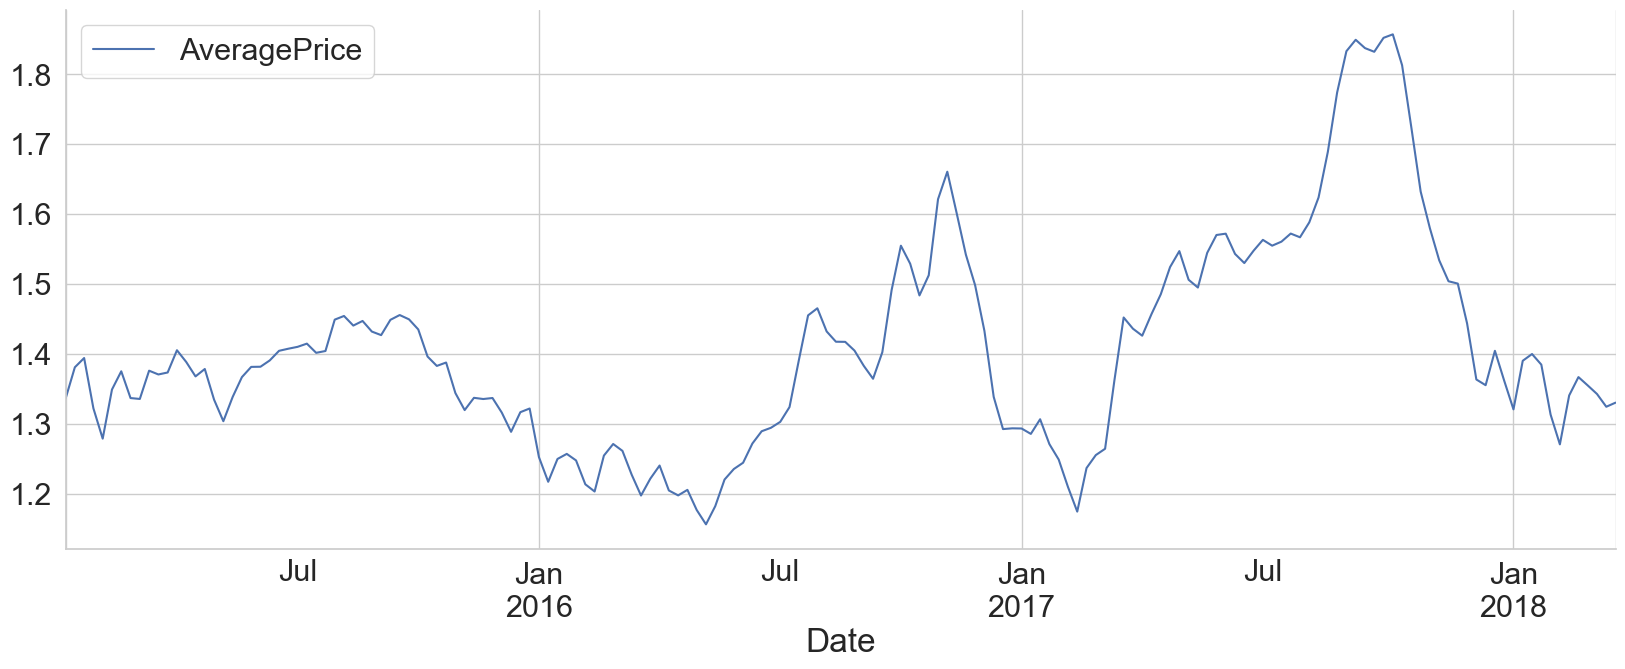

In [51]:
rolling2 = avocado_mean.rolling(2).mean().dropna()
rolling2.plot()
sns.despine()

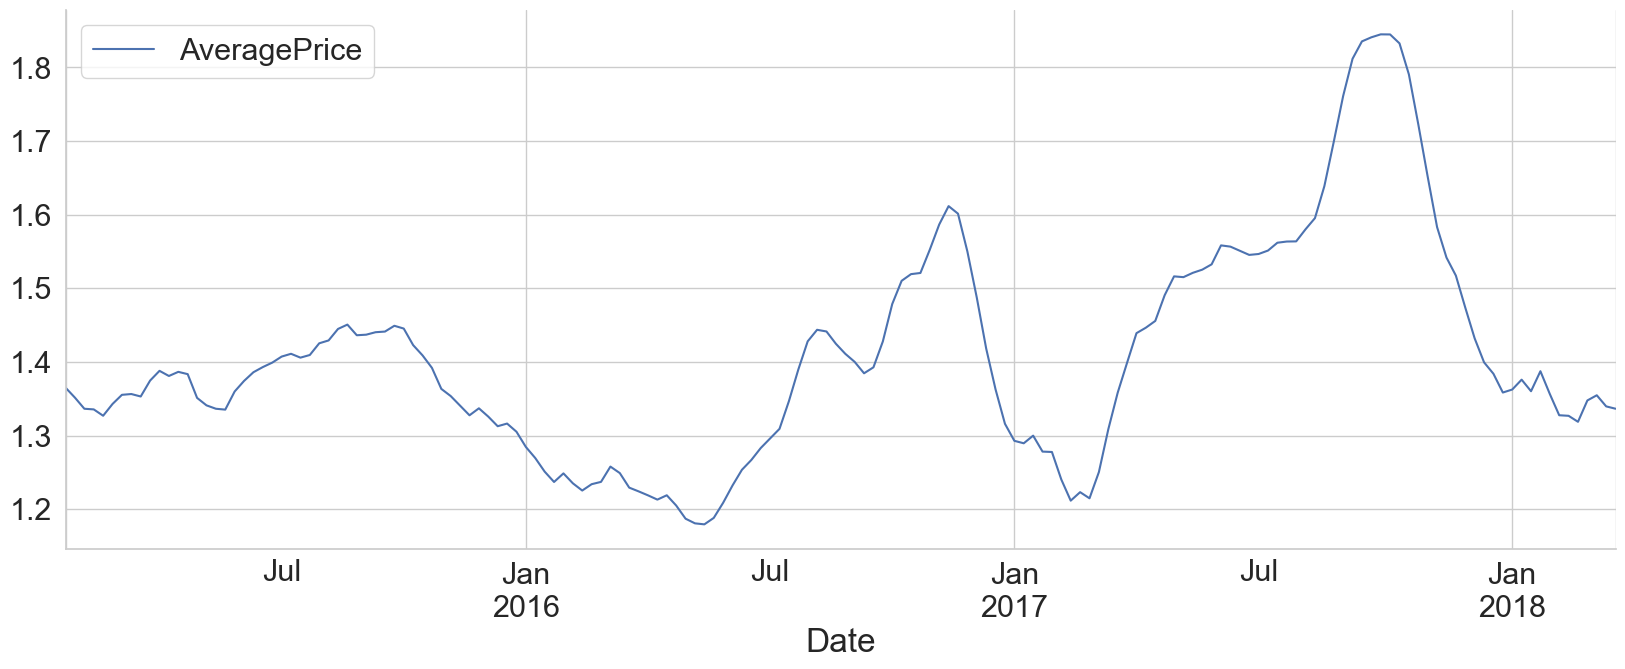

In [52]:
rolling4 = avocado_mean.rolling(4).mean().dropna()
rolling4.plot()
sns.despine()

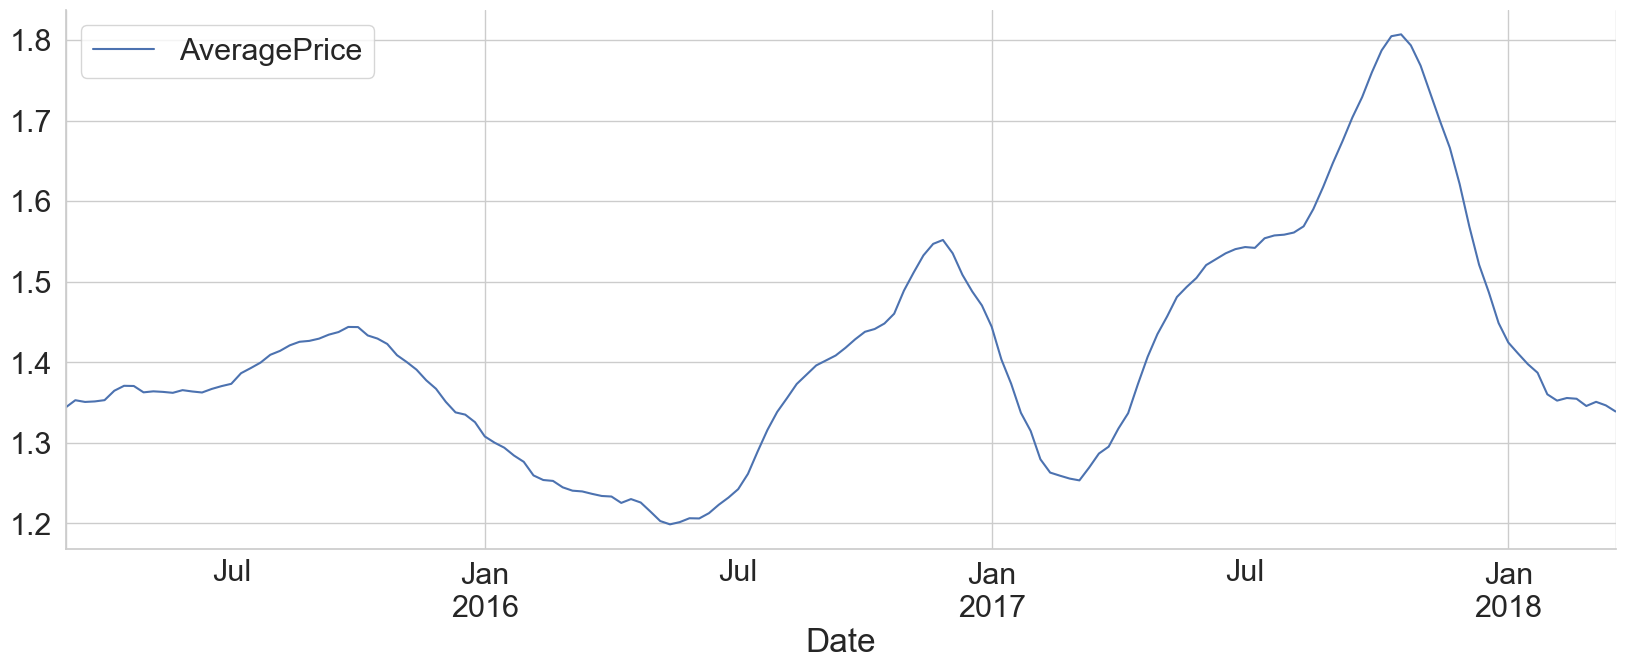

In [53]:
rolling10 = avocado_mean.rolling(10).mean().dropna()
rolling10.plot()
sns.despine()

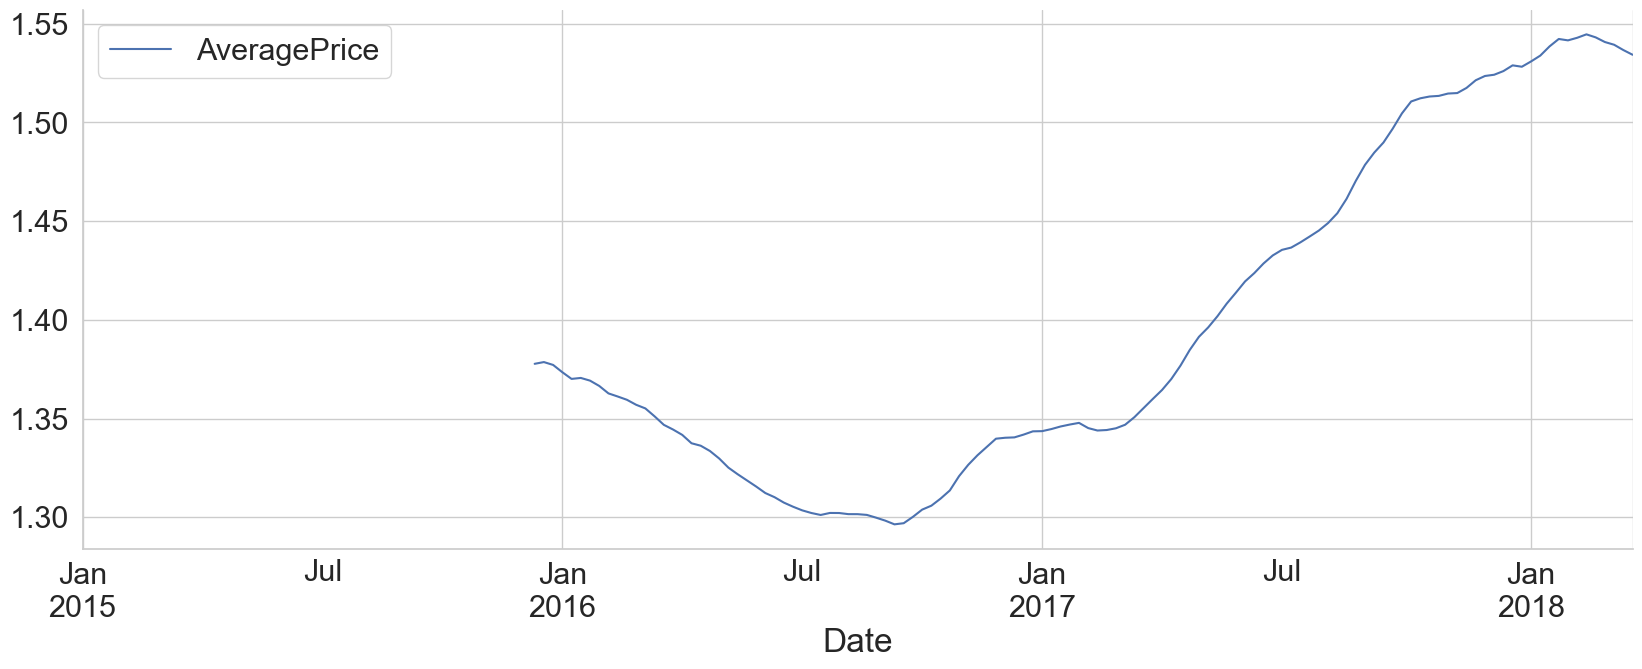

In [54]:
rolling50 = avocado_mean.rolling(50).mean()
rolling50.plot()
sns.despine()

In [ ]:
# Используйте агрегированные данные о ценах на авокадо и примените функцию ewm() с параметром span=2,
# чтобы получить экспоненциальное скользящее среднее. Запишите результат в avocado_ewm.

In [55]:
avocado_ewm = avocado_mean.ewm(span=2).mean()

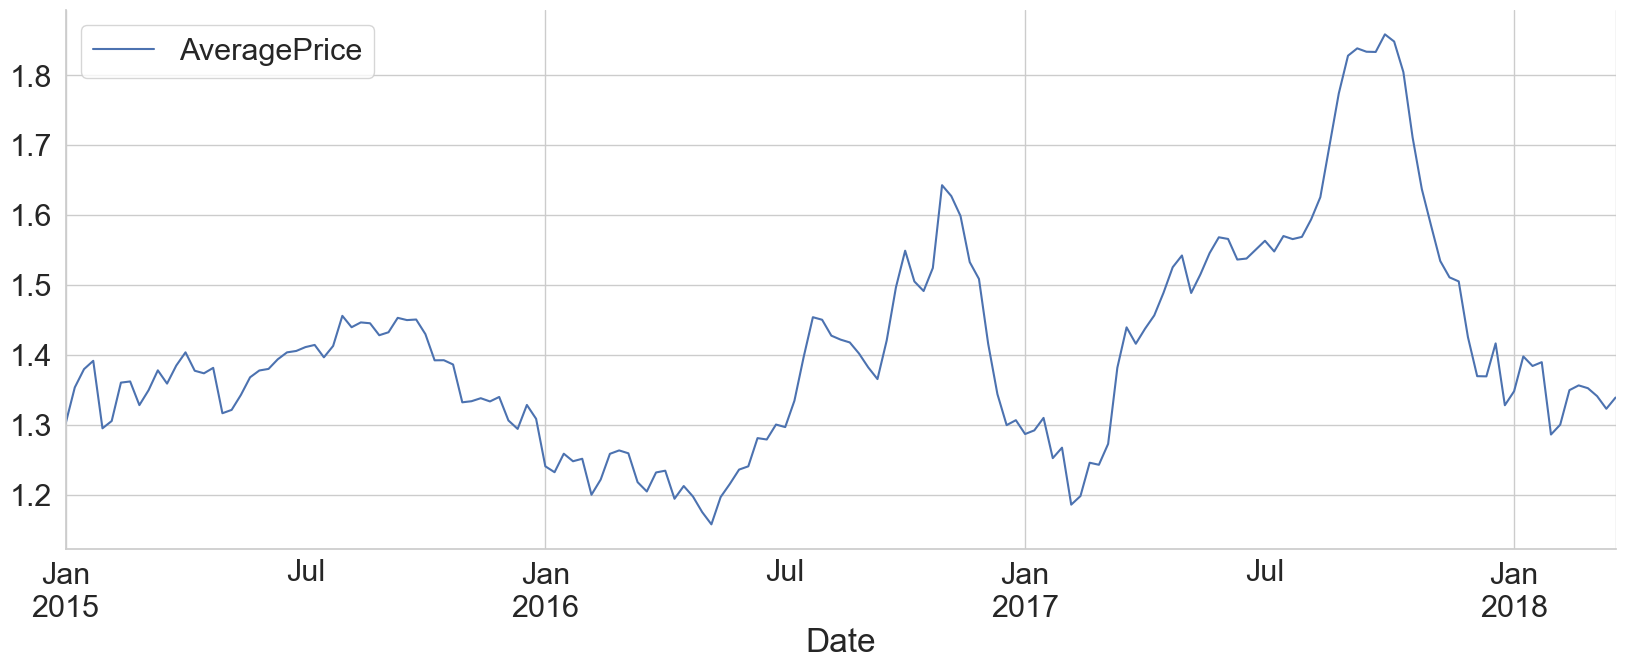

In [58]:
avocado_ewm.plot()
sns.despine()

In [80]:
# Импортируйте полные данные, указав index_col=0 (использовать первую колонку как индекс).
# Для авокадо типа organic (type) в Чикаго (region) посчитайте скользящее среднее с окном 4 и 
# экспоненциальное скользящее среднее с параметром span=4. Числа округлите до трех знаков после точки.


In [60]:
avocado = pd.read_csv('C:/Users/79295/Desktop/GITHUB/Analytical-practice/datasets/avocado_full.csv', index_col=0)

In [61]:
avocado.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


In [81]:
organic_chicago_rolling = avocado[(avocado.type =='organic')&(avocado.region == 'Chicago')][['AveragePrice']] \
    .rolling(4) \
    .mean() \
    .round(3)
organic_chicago_rolling

,AveragePrice
Date,
2015-01-04,NaN
2015-01-11,NaN
2015-01-18,NaN
2015-01-25,1.730
2015-02-01,1.738
...,...
2018-02-25,1.652
2018-03-04,1.652
2018-03-11,1.655


In [83]:
organic_chicago_ewm = avocado[(avocado.type =='organic')&(avocado.region == 'Chicago')][['AveragePrice']] \
    .ewm(span=4) \
    .mean() \
    .round(3)
organic_chicago_ewm

,AveragePrice
Date,
2015-01-04,1.490
2015-01-11,1.678
2015-01-18,1.745
2015-01-25,1.784
2015-02-01,1.670
...,...
2018-02-25,1.677
2018-03-04,1.654
2018-03-11,1.656


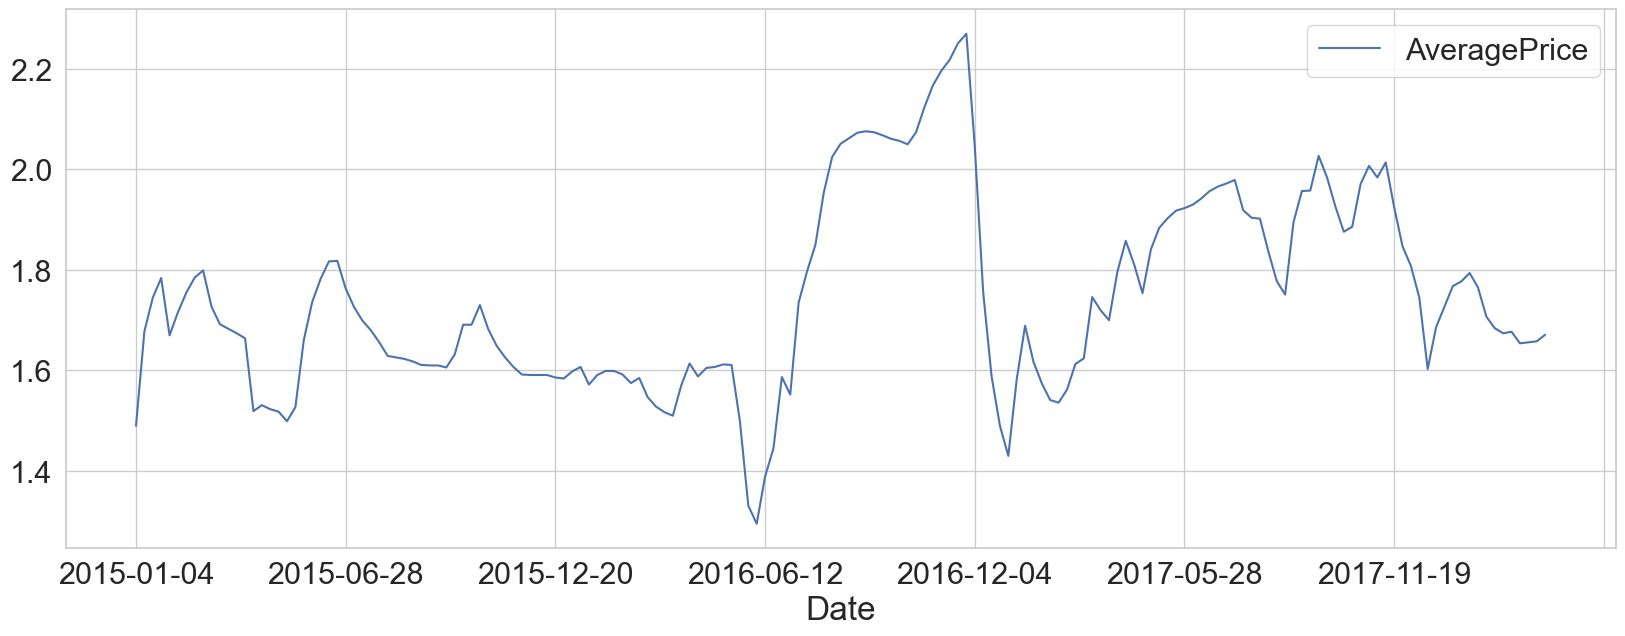

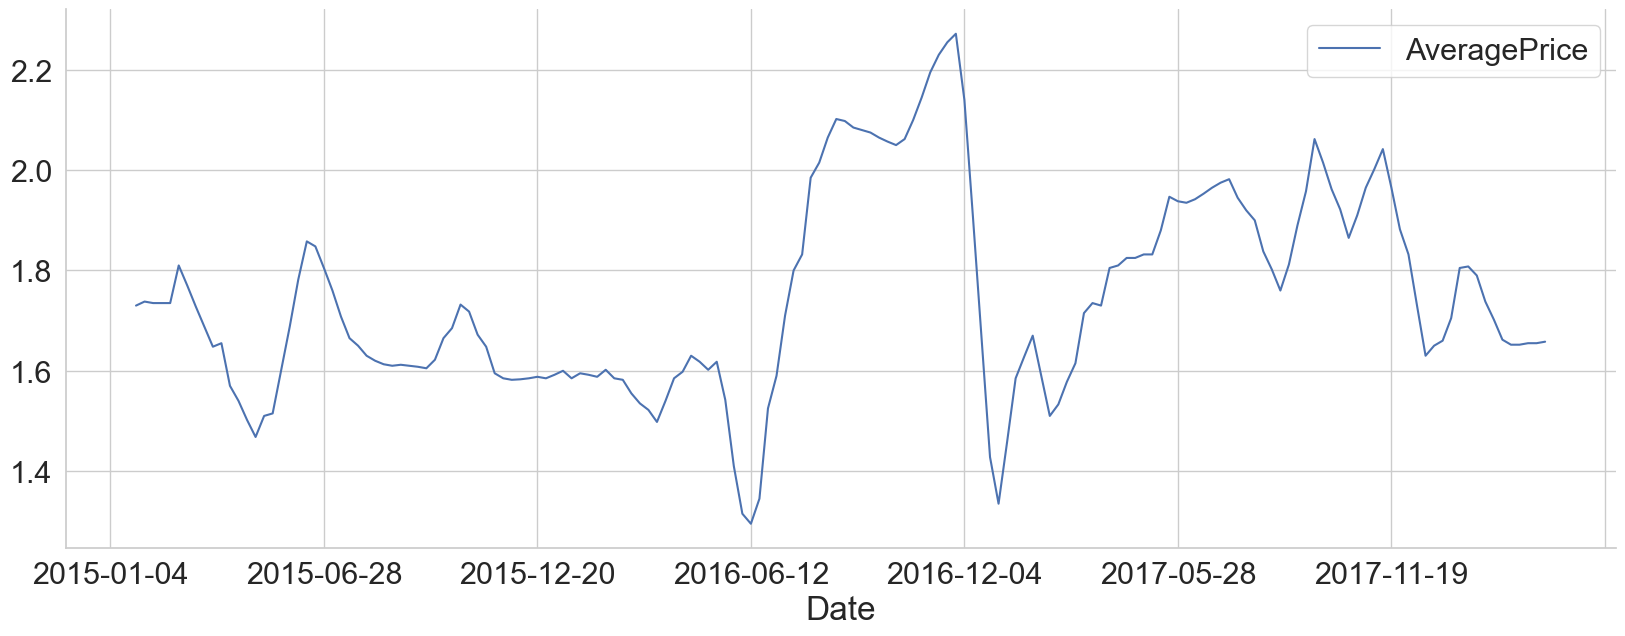

In [86]:
organic_chicago_ewm.plot()
organic_chicago_rolling.plot()
sns.despine()